Chapter 07

# 距离量化关系
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码在二维平面上展示了两点$A$和$B$到其他点的距离分布，并生成不同条件下的等距曲线。首先，代码定义了平面网格并计算网格中各点到$A(4, 2)$和$B(0, -2)$的距离函数，分别为：

$$
\text{dist}_{AX} = \sqrt{(x - A_x)^2 + (y - A_y)^2}
$$
$$
\text{dist}_{BX} = \sqrt{(x - B_x)^2 + (y - B_y)^2}
$$

代码计算网格中每一点到$A$和$B$的距离，并用等高线图分别展示两点的距离分布。基于距离差的不同条件，代码生成以下几种距离关系的等距线图：

1. **等距线$\text{dist}_{AX} - \text{dist}_{BX} = 0$**：表示距离$A$和$B$距离相等的点的集合，这些点形成的等距线在几何上为双曲线。
2. **距离差变化的等距线**：
   - 当$\text{dist}_{AX} - \text{dist}_{BX} = 3$时，表示到$A$的距离比到$B$的距离多3个单位的点。
   - 当$\text{dist}_{AX} - \text{dist}_{BX} = -3$时，表示到$A$的距离比到$B$的距离少3个单位的点。
3. **加权和的等距线**：
   - $\text{dist}_{AX} - 2\text{dist}_{BX} = 0$表示到$A$的距离等于到$B$距离的两倍的点。
   - $\text{dist}_{AX} + \text{dist}_{BX} = 8$表示到$A$和$B$距离和为8的点集合，这些点形成椭圆。

通过这些条件，代码在二维平面上生成多条等距曲线，展示了不同几何条件下的等距点集。这些曲线包括双曲线、椭圆等常见几何曲线，反映了不同点之间的距离关系，是分析平面几何距离和等距线的一种可视化方法。

## 导入所需库

In [1]:
import numpy as np  # 导入numpy库，用于数值计算
from sympy import lambdify, sqrt  # 导入sympy的lambdify函数和sqrt函数
from sympy.abc import x, y  # 定义符号变量x和y
from matplotlib import pyplot as plt  # 导入matplotlib库用于绘图

## 自定义函数 - 绘制距离等高线图
def plot_fcn(A, B, dist_AX_zz, dist_BX_zz, distance):  # 绘制点A和B的等距线以及距离差的等高线
    fig, ax = plt.subplots()  # 创建图形和坐标轴

    plt.plot(A[0], A[1], color='k', marker='x', markersize=12)  # 绘制点A

    colorbar = ax.contour(xx, yy, dist_AX_zz, levels=np.arange(0, 16), cmap='RdYlBu_r')  # 绘制点A的距离等高线

    plt.plot(B[0], B[1], color='k', marker='x', markersize=12)  # 绘制点B

    colorbar = ax.contour(xx, yy, dist_BX_zz, levels=np.arange(0, 16), cmap='RdYlBu_r')  # 绘制点B的距离等高线

    ax.contour(xx, yy, distance, levels=0, colors='k')  # 绘制距离差为零的等距线

    fig.colorbar(colorbar, ax=ax)  # 添加色条

    plt.xlabel('x')  # 设置x轴标签
    plt.ylabel('y')  # 设置y轴标签
    plt.axhline(y=0, color='k', linestyle='-')  # 绘制y轴
    plt.axvline(x=0, color='k', linestyle='-')  # 绘制x轴
    plt.xticks(np.arange(-10, 10, step=2))  # 设置x轴刻度
    plt.yticks(np.arange(-10, 10, step=2))  # 设置y轴刻度
    plt.axis('scaled')  # 保持x和y轴比例一致

    ax.set_xlim(x_array.min(), x_array.max())  # 设置x轴范围
    ax.set_ylim(y_array.min(), y_array.max())  # 设置y轴范围
    ax.spines['top'].set_visible(False)  # 隐藏顶部边框
    ax.spines['right'].set_visible(False)  # 隐藏右侧边框
    ax.spines['bottom'].set_visible(False)  # 隐藏底部边框
    ax.spines['left'].set_visible(False)  # 隐藏左侧边框

    ax.grid(linestyle='--', linewidth=0.25, color=[0.8, 0.8, 0.8])  # 添加虚线网格

## 定义点A和点B

In [2]:
A = [4, 2]  # 点A的坐标
B = [0, -2]  # 点B的坐标

## 创建网格

In [3]:
num = 301  # 网格数量
x_array = np.linspace(-8, 8, num)  # x轴坐标范围
y_array = np.linspace(-8, 8, num)  # y轴坐标范围

xx, yy = np.meshgrid(x_array, y_array)  # 生成二维网格

## 定义距离函数

In [4]:
dist_AX = sqrt((x - A[0])**2 + (y - A[1])**2)  # 点A到网格中各点的距离
dist_BX = sqrt((x - B[0])**2 + (y - B[1])**2)  # 点B到网格中各点的距离

dist_AX_fcn = lambdify([x, y], dist_AX)  # 将符号函数转换为数值函数
dist_BX_fcn = lambdify([x, y], dist_BX)  # 将符号函数转换为数值函数

dist_AX_zz = dist_AX_fcn(xx, yy)  # 计算网格中每点到A的距离
dist_BX_zz = dist_BX_fcn(xx, yy)  # 计算网格中每点到B的距离

## 绘制不同条件下的距离差等高线

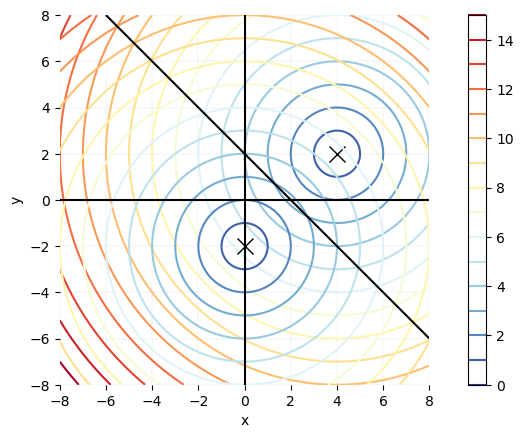

In [5]:
# AX - BX = 0
distance = dist_AX_zz - dist_BX_zz  # 距离差
plot_fcn(A, B, dist_AX_zz, dist_BX_zz, distance)  # 绘制等高线

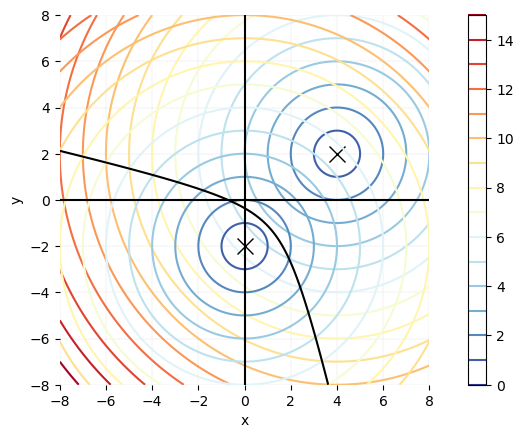

In [6]:
# AX - BX - 3 = 0
distance = dist_AX_zz - dist_BX_zz - 3  # 距离差减3
plot_fcn(A, B, dist_AX_zz, dist_BX_zz, distance)  # 绘制等高线

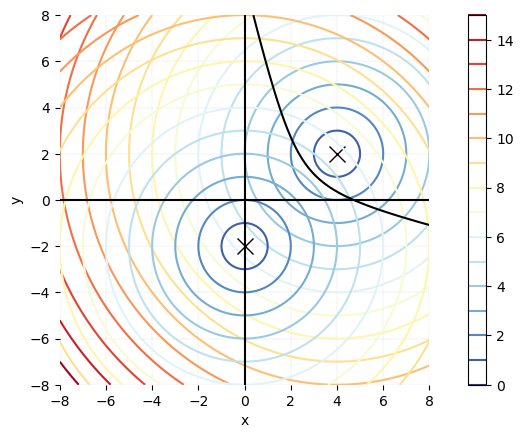

In [7]:
# AX - BX + 3 = 0
distance = dist_AX_zz - dist_BX_zz + 3  # 距离差加3
plot_fcn(A, B, dist_AX_zz, dist_BX_zz, distance)  # 绘制等高线

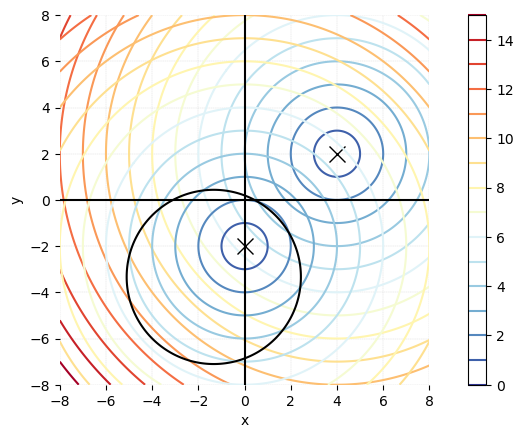

In [8]:
# AX - 2*BX = 0
distance = dist_AX_zz - 2 * dist_BX_zz  # AX - 2*BX的距离差
plot_fcn(A, B, dist_AX_zz, dist_BX_zz, distance)  # 绘制等高线

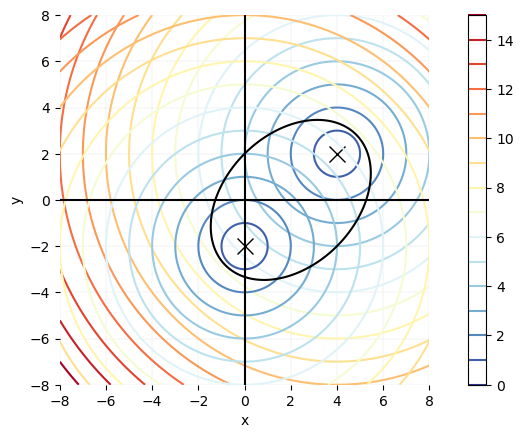

In [9]:
# BX + AX - 8 = 0
distance = dist_BX_zz + dist_AX_zz - 8  # BX + AX - 8的距离差
plot_fcn(A, B, dist_AX_zz, dist_BX_zz, distance)  # 绘制等高线